In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline 
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [75]:
# # here we are Getting the stock quote
# df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# # printing the data
# df

# import pandas_datareader as pdr
# import datetime as dt
# ticker = "AAPL"
# start = dt.datetime(2002, 1, 1)
# end = dt.datetime(2022, 11, 19)
# data = pdr.get_data_yahoo(ticker, start, end, 
# #                           interval='day'
#                          )
# print(data)

start = pd.to_datetime(['2002-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2023-01-16']).astype(int)[0]//10**9 # convert to unix timestamp.
stock_ticker="HDB"
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url)


<ipython-input-75-c864824f20ac>:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  start = pd.to_datetime(['2002-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
<ipython-input-75-c864824f20ac>:17: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  end = pd.to_datetime(['2023-01-16']).astype(int)[0]//10**9 # convert to unix timestamp.


In [76]:
df.shape

(5296, 7)

In [77]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5291,2023-01-09,67.589996,67.959999,66.559998,67.400002,67.400002,1027000
5292,2023-01-10,67.099998,67.120003,65.230003,65.580002,65.580002,1356200
5293,2023-01-11,65.940002,66.849998,65.360001,66.580002,66.580002,1166100
5294,2023-01-12,67.139999,67.139999,66.349998,66.699997,66.699997,1251200
5295,2023-01-13,66.360001,67.809998,66.290001,67.519997,67.519997,959800


In [78]:
tt=df[["Date", "Open"]]
tt.set_index(["Date"], inplace=True)

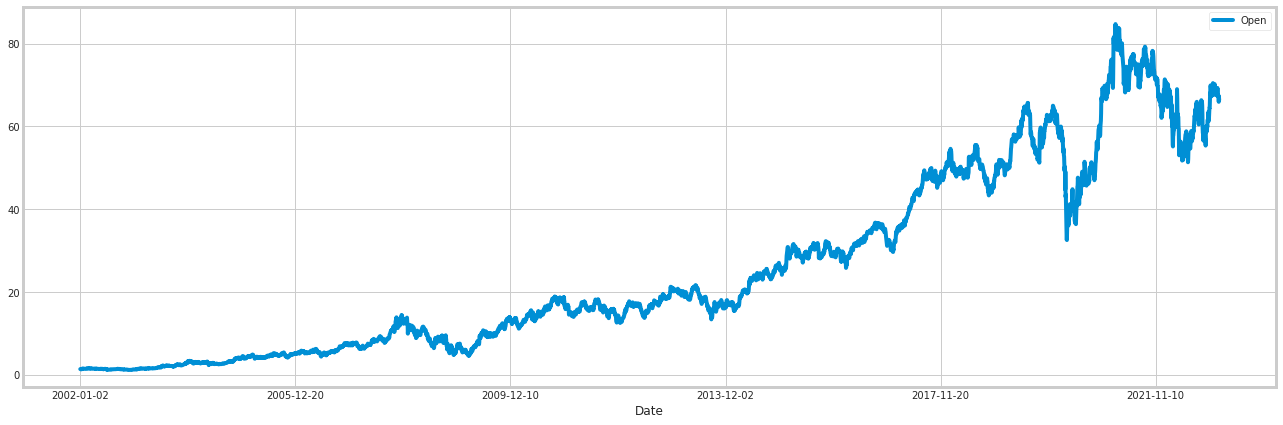

In [79]:
tt.plot(figsize=(20,7))
plt.show()

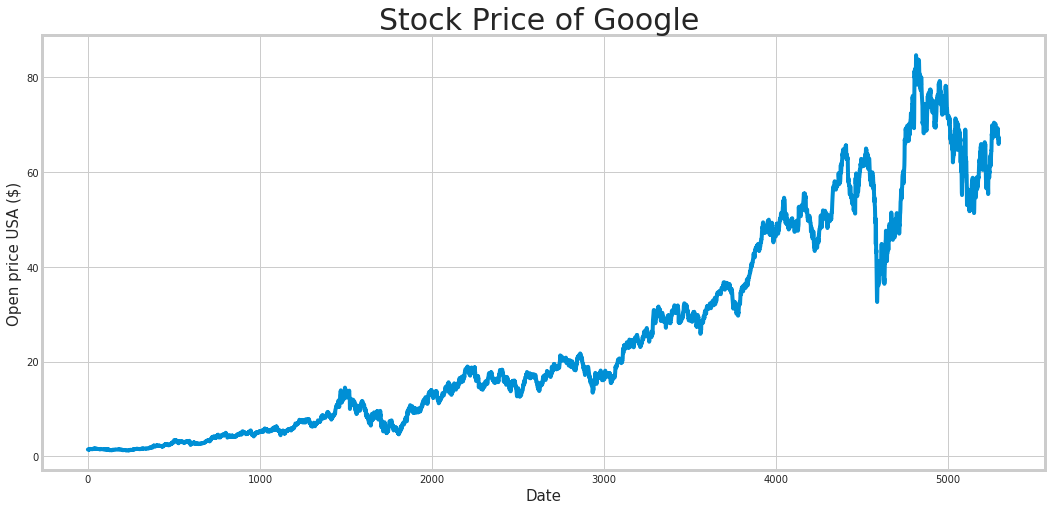

In [80]:
plt.figure(figsize=(16,8))
plt.plot(df["Open"])
plt.title("Stock Price of Google ", fontsize=30)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Open price USA ($)", fontsize=15)
plt.show()

In [ ]:
# To stock price prediction in lstm / deeplearning - 
# we require to know that todays sale/price depends on how many previous values 

In [81]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-01-02,1.440,1.461,1.440,1.461,1.266397,105000
1,2002-01-03,1.445,1.459,1.430,1.430,1.239527,263000
2,2002-01-04,1.420,1.470,1.390,1.390,1.204854,825000
3,2002-01-07,1.380,1.380,1.346,1.375,1.191852,251000
4,2002-01-08,1.385,1.385,1.352,1.375,1.191852,223000


In [82]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5291,2023-01-09,67.589996,67.959999,66.559998,67.400002,67.400002,1027000
5292,2023-01-10,67.099998,67.120003,65.230003,65.580002,65.580002,1356200
5293,2023-01-11,65.940002,66.849998,65.360001,66.580002,66.580002,1166100
5294,2023-01-12,67.139999,67.139999,66.349998,66.699997,66.699997,1251200
5295,2023-01-13,66.360001,67.809998,66.290001,67.519997,67.519997,959800


In [83]:
data=df["Close"]
data_set=data.values

In [86]:
data.max()

83.75

In [87]:
data_set

array([ 1.461   ,  1.43    ,  1.39    , ..., 66.580002, 66.699997,
       67.519997])

In [88]:
data_set.shape

(5296,)

In [89]:
data_set=data_set.reshape(-1,1)

In [90]:
data_set.shape

(5296, 1)

In [91]:
data_set

array([[ 1.461   ],
       [ 1.43    ],
       [ 1.39    ],
       ...,
       [66.580002],
       [66.699997],
       [67.519997]])

In [92]:
# Two Things - 
# 1 Train Test Split - We alsways split the data by Time Basis ( Dont use train_test_split code)
# 2.You need to know that todays price depends on how many previous days/month ( depends on your time taken)


In [93]:
# standardized the Data
scaler=MinMaxScaler(feature_range=(0,1))

scaled_data=scaler.fit_transform(data_set)
scaled_data

array([[0.00301679],
       [0.00264121],
       [0.00215658],
       ...,
       [0.79197463],
       [0.79342845],
       [0.80336326]])

In [94]:
train_index=math.ceil(len(data_set)*.9)
train_index

4767

In [95]:
train_data=scaled_data[:train_index, :]
test_data=scaled_data[train_index:, :]
# test_data

In [96]:
train_data.shape

(4767, 1)

In [97]:
test_data.shape

(529, 1)

In [98]:
# for i in range(10, 100):
#   print(train_data[i-10: i, :])

In [99]:
X_train=[]
y_train=[]

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [100]:
x_train, y_train=np.array(X_train), np.array(y_train)

In [101]:
x_train.shape

(4707, 60)

In [102]:
# pd.DataFrame(x_train)
# pd.DataFrame(x_train)

In [103]:
# Here we are reshaping the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [104]:
x_train.shape 

(4707, 60, 1)

In [105]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True, activation="linear", input_shape=(60,1)))
model.add(LSTM(units=50,return_sequences=True ,activation="linear",))
model.add(LSTM(units=100,return_sequences=False, activation="linear", ))
model.add(Dense(units=10, activation="linear",))
model.add(Dense(units=1, activation="linear"))

In [106]:
model.compile(optimizer="rmsprop", loss="mean_squared_error")

In [107]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 100)               60400     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 92,021
Trainable params: 92,021
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.fit(x_train, y_train, batch_size=20, epochs=15)

Epoch 1/15
236/236 [==============================] - 68s 275ms/step - loss: 0.0041
Epoch 2/15
236/236 [==============================] - 63s 266ms/step - loss: 0.0012
Epoch 3/15
236/236 [==============================] - 62s 264ms/step - loss: 8.3681e-04
Epoch 4/15
236/236 [==============================] - 64s 270ms/step - loss: 5.9159e-04
Epoch 5/15
236/236 [==============================] - 63s 266ms/step - loss: 4.5794e-04
Epoch 6/15
236/236 [==============================] - 62s 263ms/step - loss: 3.7542e-04
Epoch 7/15
236/236 [==============================] - 63s 268ms/step - loss: 3.4380e-04
Epoch 8/15
236/236 [==============================] - 62s 262ms/step - loss: 3.0718e-04
Epoch 9/15
236/236 [==============================] - 62s 262ms/step - loss: 2.8685e-04
Epoch 10/15
236/236 [==============================] - 63s 267ms/step - loss: 2.5470e-04
Epoch 11/15
236/236 [==============================] - 62s 262ms/step - loss: 2.3832e-04
Epoch 12/15
236/236 [=================

In [109]:
# here we are testing data set
test_data = scaled_data[train_index - 60: , : ]
x_test = []
y_test =  data_set[train_index : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [110]:
test_data.shape 

(589, 1)

In [111]:
x_test = np.array(x_test)

In [112]:
# here we are reshaping the data into the shape accepted by the LSTM  
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [113]:
# now we are getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

17/17 [==============================] - 1s 22ms/step


In [114]:
# predictions
pred=pd.DataFrame(predictions)
pred.columns=["Precicted_value"]
pred.tail()

,Precicted_value
524,63.844780
525,63.677944
526,61.707882
527,63.204300
528,63.042698


In [115]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5291,2023-01-09,67.589996,67.959999,66.559998,67.400002,67.400002,1027000
5292,2023-01-10,67.099998,67.120003,65.230003,65.580002,65.580002,1356200
5293,2023-01-11,65.940002,66.849998,65.360001,66.580002,66.580002,1166100
5294,2023-01-12,67.139999,67.139999,66.349998,66.699997,66.699997,1251200
5295,2023-01-13,66.360001,67.809998,66.290001,67.519997,67.519997,959800


In [116]:
act_test=scaled_data[train_index:, :]

In [117]:
# act_test

In [118]:
pred

,Precicted_value
0,63.959751
1,63.892960
2,63.909599
3,63.872345
4,63.094620
...,...
524,63.844780
525,63.677944
526,61.707882
527,63.204300


In [119]:
act=pd.DataFrame(y_test)
act.columns=["Actual_value"]
act.head()

,Actual_value
0,67.379997
1,67.449997
2,67.470001
3,66.760002
4,66.599998


In [120]:
pd.concat([act, pred],axis=1).tail()

,Actual_value,Precicted_value
524,67.400002,63.844780
525,65.580002,63.677944
526,66.580002,61.707882
527,66.699997,63.204300
528,67.519997,63.042698


In [69]:
np.mean((act["Actual_value"] -pred["Precicted_value"])**2)

8.23979497168921

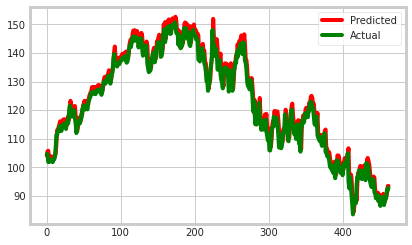

In [74]:
plt.plot(pred["Precicted_value"], label="Predicted", color="red")
plt.plot(act["Actual_value"], label="Actual", color="green")
plt.legend()
plt.show()

In [ ]:
# Can we predict future value which we have not taken into train and Test data ?


In [ ]:
a

In [ ]:
n_lookback = 60  # length of input sequences (lookback period)
n_forecast = 30 

In [ ]:
X = []
Y = []

for i in range(n_lookback, len(y_test) - n_forecast + 1):
    X.append(y_test[i - n_lookback: i])
    Y.append(y_test[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4591,2022-11-11,94.709999,97.360001,94.160004,96.730003,96.730003,30536500
4592,2022-11-14,95.500000,97.180000,95.112999,96.029999,96.029999,24170100
4593,2022-11-15,98.669998,100.419998,97.019997,98.720001,98.720001,31831000
4594,2022-11-16,98.019997,99.849998,97.902000,98.989998,98.989998,24660200


In [ ]:
import numpy as np
import pandas as pd
# import yfinance as yf
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None
tf.random.set_seed(0)

# download the data
# df = yf.download(tickers=['AAPL'], period='1y')
# y = df['Close'].fillna(method='ffill')


start = pd.to_datetime(['2002-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-11-18']).astype(int)[0]//10**9 # convert to unix timestamp.
stock_ticker="GOOG"
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url)
y = df['Close'].fillna(method='ffill') 



y = y.values.reshape(-1, 1)
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)

# generate the input and output sequences
n_lookback = 60  # length of input sequences (lookback period)
n_forecast = 30  # length of output sequences (forecast period)

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

# fit the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=32)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.


Epoch 1/100
141/141 [==============================] - 4s 8ms/step - loss: 0.0099
Epoch 2/100
141/141 [==============================] - 1s 8ms/step - loss: 7.8872e-04
Epoch 3/100
141/141 [==============================] - 1s 8ms/step - loss: 7.5507e-04
Epoch 4/100
141/141 [==============================] - 1s 8ms/step - loss: 6.8572e-04
Epoch 5/100
141/141 [==============================] - 1s 8ms/step - loss: 6.5873e-04
Epoch 6/100
141/141 [==============================] - 1s 8ms/step - loss: 6.4274e-04
Epoch 7/100
141/141 [==============================] - 1s 8ms/step - loss: 7.0214e-04
Epoch 8/100
141/141 [==============================] - 1s 8ms/step - loss: 6.3927e-04
Epoch 9/100
141/141 [==============================] - 1s 8ms/step - loss: 6.3349e-04
Epoch 10/100
141/141 [==============================] - 1s 8ms/step - loss: 6.0402e-04
Epoch 11/100
141/141 [==============================] - 1s 8ms/step - loss: 6.4844e-04
Epoch 12/100
141/141 [==============================] - 

In [ ]:
# Printing the last 10 values
print('Original Prices')
print(y[-10:])
 
print('###################')
 
# Printing last 10 values of the scaled data which we have created above for the last model
# Here I am changing the shape of the data to one dimensional array because
# for Multi step data preparation we need to X input in this fashion
X_test=X_test.reshape(X_test.shape[0],)
print('Scaled Prices')
print(X_test[-10:])

Original Prices
[[0.5681431 ]
 [0.58129943]
 [0.58305361]
 [0.57286591]
 [0.61854182]
 [0.6358137 ]
 [0.6310909 ]
 [0.64923985]
 [0.65106147]
 [0.64775554]]
###################


NameError: ignored

In [ ]:

# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame
df_past = df[['Close']].reset_index()
df_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

# plot the results
results.plot(title='AAPL')


In [ ]:
# https://thinkingneuron.com/predicting-stock-prices-using-deep-learning-lstm-model-in-python/